# Project II

### Rotten Tomatoes and IMDb or Internet Movie Database are very popular film review sites that help people to look up and know about films. These are online sources that help people decide whether to watch a film or not.

While Imdb ratings of 1-10 are based upon reviews of the audiences, Rotten Tomatoes bases its ratings upon reviews from certified members of writing guilds. Both are subjective but carry enough respect in the minds of the audiences.



IMDb ratings are based upon reviews of the audiences, while Rotten Tomatoes bases its ratings upon reviews from certified members

## Exploring & Cleaning

In [15]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import requests
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df_rotten = pd.read_csv ('./data/rottentomatoes-400k.csv', encoding='unicode_escape', index_col = 0)
df_rotten.head(5)

,Movie,Reviewer,Publish,Review,Date,Score
0,HOTEL TRANSYLVANIA: TRANSFORMANIA,James Luxford,City AM,I guess its always been hard for me to see the...,03/03/2022,40.0
1,HOTEL TRANSYLVANIA: TRANSFORMANIA,Mat Brunet,AniMat's Review (YouTube),Hotel Transylvania: Transformania is a present...,15/02/2022,30.0
2,HOTEL TRANSYLVANIA: TRANSFORMANIA,Robert Levin,Newsday,The conceit still works well enough to mostly ...,29/01/2022,75.0
3,HOTEL TRANSYLVANIA: TRANSFORMANIA,Jackie K. Cooper,jackiekcooper.com,"No Adam Sandler this time out, but the animate...",28/01/2022,60.0
4,HOTEL TRANSYLVANIA: TRANSFORMANIA,Asher Luberto,The Playlist,It's not likely we'll see another one of these...,28/01/2022,74.0


In [3]:
df_rotten.isnull().sum() #Is the dataset cleaned?


Movie       0
Reviewer    0
Publish     0
Review      0
Date        0
Score       0
dtype: int64

In [4]:
df_rotten['Movie'] = df_rotten['Movie'].str.title()
df_rotten.head()

,Movie,Reviewer,Publish,Review,Date,Score
0,Hotel Transylvania: Transformania,James Luxford,City AM,I guess its always been hard for me to see the...,03/03/2022,40.0
1,Hotel Transylvania: Transformania,Mat Brunet,AniMat's Review (YouTube),Hotel Transylvania: Transformania is a present...,15/02/2022,30.0
2,Hotel Transylvania: Transformania,Robert Levin,Newsday,The conceit still works well enough to mostly ...,29/01/2022,75.0
3,Hotel Transylvania: Transformania,Jackie K. Cooper,jackiekcooper.com,"No Adam Sandler this time out, but the animate...",28/01/2022,60.0
4,Hotel Transylvania: Transformania,Asher Luberto,The Playlist,It's not likely we'll see another one of these...,28/01/2022,74.0


In [5]:
df_rotten_t= df_rotten.copy()


In [6]:
df_rotten_t= df_rotten_t.groupby("Movie", as_index = False, sort = False).agg({"Score":"mean"})

In [7]:
df_rotten_t ['Score'].astype(float)
df_rotten_t ['Score'] = round(df_rotten_t ['Score'] / 10, 1)

In [8]:
df_rotten_t.rename(columns = {'Score':'RottenT_Rating'}, inplace = True)

In [9]:
df_rotten_t

,Movie,RottenT_Rating
0,Hotel Transylvania: Transformania,5.5
1,Sensation,4.3
2,A Cops And Robbers Story,7.7
3,Try Harder!,7.7
4,President,7.8
...,...,...
9361,Noise,8.3
9362,The Cottage,5.8
9363,Remember The Daze,4.2
9364,Hitler: The Last Ten Days,3.2


In [10]:
df_rotten_t.to_csv("../Project2_JOA/data/df_rotten_tomatoes_cleaned.csv", index= True)

In [2]:
df_rotten_tomatoes = pd.read_csv ('./data/df_rotten_tomatoes_cleaned.csv', encoding='unicode_escape', index_col = 0)
df_rotten_tomatoes

,Movie,RottenT_Rating
0,Hotel Transylvania: Transformania,5.5
1,Sensation,4.3
2,A Cops And Robbers Story,7.7
3,Try Harder!,7.7
4,President,7.8
...,...,...
9361,Noise,8.3
9362,The Cottage,5.8
9363,Remember The Daze,4.2
9364,Hitler: The Last Ten Days,3.2


### DATASET #2

In [18]:
df_imdb = pd.read_csv ('./data/imdb_top_1000.csv', encoding='unicode_escape', index_col = 0)

In [19]:
df_imdb.rename(columns = {'Series_Title':'Movie'}, inplace = True)

In [20]:
df_imdb.reset_index(drop=True, inplace=True)
df_imdb.sample(5)

,Movie,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
761,Toki o kakeru shÃ´jo,2006,U,98 min,Animation,7.7,A high-school girl named Makoto acquires the p...,NaN,Mamoru Hosoda,Riisa Naka,Takuya Ishida,Mitsutaka Itakura,Ayami Kakiuchi,60368,35740002
126,Metropolis,1927,U,153 min,Drama,8.3,In a futuristic city sharply divided between t...,98.0,Fritz Lang,Brigitte Helm,Alfred Abel,Gustav FrÃ¶hlich,Rudolf Klein-Rogge,159992,1236166
378,The Incredibles,2004,U,115 min,Animation,8.0,"A family of undercover superheroes, while tryi...",90.0,Brad Bird,Craig T. Nelson,Samuel L. Jackson,Holly Hunter,Jason Lee,657047,261441092
265,DÃ hÃ³ng denglong gaogao guÃ,1991,PG,125 min,Drama,8.1,A young woman becomes the fourth wife of a wea...,NaN,Yimou Zhang,Gong Li,Jingwu Ma,Saifei He,Cuifen Cao,29662,2603061
158,Hauru no ugoku shiro,2004,U,119 min,Animation,8.2,When an unconfident young woman is cursed with...,80.0,Hayao Miyazaki,Chieko BaishÃ´,Takuya Kimura,Tatsuya GashÃ»in,Akihiro Miwa,333915,4711096


In [21]:
df_imdb.drop(['Certificate', 'Runtime', 'Overview', 'Meta_score', 'Star1', 'Star2', 'Star3', 'Star4','No_of_Votes', 'Gross'], axis=1, inplace = True)
df_imdb = df_imdb[['Movie','Released_Year','Genre','Director','IMDB_Rating']]
df_imdb


,Movie,Released_Year,Genre,Director,IMDB_Rating
0,The Shawshank Redemption,1994,Drama,Frank Darabont,9.3
1,The Godfather,1972,Crime,Francis Ford Coppola,9.2
2,The Dark Knight,2008,Action,Christopher Nolan,9.0
3,The Godfather: Part II,1974,Crime,Francis Ford Coppola,9.0
4,12 Angry Men,1957,Crime,Sidney Lumet,9.0
...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,Comedy,Blake Edwards,7.6
996,Giant,1956,Drama,George Stevens,7.6
997,From Here to Eternity,1953,Drama,Fred Zinnemann,7.6
998,Lifeboat,1944,Drama,Alfred Hitchcock,7.6


In [23]:
df_imdb['Movie'] = df_imdb['Movie'].str.title() 


In [24]:
df_imdb.to_csv("../Project2_JOA/data/df_imdb_cleaned.csv", index= False)

In [3]:
df_IMDb= pd.read_csv ('./data/df_imdb_cleaned.csv', encoding='unicode_escape')

In [4]:
df_IMDb

,Movie,Released_Year,Genre,Director,IMDB_Rating
0,The Shawshank Redemption,1994,Drama,Frank Darabont,9.3
1,The Godfather,1972,Crime,Francis Ford Coppola,9.2
2,The Dark Knight,2008,Action,Christopher Nolan,9.0
3,The Godfather: Part Ii,1974,Crime,Francis Ford Coppola,9.0
4,12 Angry Men,1957,Crime,Sidney Lumet,9.0
...,...,...,...,...,...
995,Breakfast At Tiffany'S,1961,Comedy,Blake Edwards,7.6
996,Giant,1956,Drama,George Stevens,7.6
997,From Here To Eternity,1953,Drama,Fred Zinnemann,7.6
998,Lifeboat,1944,Drama,Alfred Hitchcock,7.6


In [5]:
Movie_list = []
Released_Year_list = []
Genre_list = []
Director_list = []
IMDB_Rating_list = []
RottenT_Rating_list = []

for i in range (len(df_IMDb['Movie'])):
    if df_IMDb['Movie'][i] in list(df_rotten_tomatoes['Movie']):
        Movie_list.append(df_IMDb['Movie'][i])
        Released_Year_list.append(df_IMDb['Released_Year'][i])
        Genre_list.append(df_IMDb['Genre'][i])
        Director_list.append(df_IMDb['Director'][i])
        IMDB_Rating_list.append(df_IMDb['IMDB_Rating'][i])
        RottenT_Rating_list.append(df_rotten_tomatoes['RottenT_Rating'][i])
        

In [11]:
len(Movie_list)

225

In [6]:
df_FINAL = pd.DataFrame(columns = ['Movie', 'Released_Year', 'Genre', 'Director','IMDB_Rating', 'RottenT_Rating', 'DIF'])
df_FINAL

,Movie,Released_Year,Genre,Director,IMDB_Rating,RottenT_Rating,DIF


In [7]:
df_FINAL['Movie'] = Movie_list
df_FINAL['Released_Year'] = Released_Year_list
df_FINAL['Genre'] = Genre_list
df_FINAL['Director'] = Director_list
df_FINAL['IMDB_Rating'] = IMDB_Rating_list
df_FINAL['RottenT_Rating'] = RottenT_Rating_list

In [9]:
dif_list = []
for i in range(225):
    dif_list.append((round(df_FINAL['IMDB_Rating'][i] - df_FINAL['RottenT_Rating'][i],2)))
df_FINAL['DIF'] = dif_list

In [10]:
df_FINAL

,Movie,Released_Year,Genre,Director,IMDB_Rating,RottenT_Rating,DIF
0,Inception,2010,Action,Christopher Nolan,8.8,7.1,1.7
1,Interstellar,2014,Adventure,Christopher Nolan,8.6,7.3,1.3
2,Joker,2019,Crime,Todd Phillips,8.5,4.7,3.8
3,Whiplash,2014,Drama,Damien Chazelle,8.5,6.1,2.4
4,The Intouchables,2011,Biography,Olivier Nakache,8.5,5.9,2.6
...,...,...,...,...,...,...,...
220,Mulan,1998,Animation,Tony Bancroft,7.6,4.4,3.2
221,Funny Games,1997,Crime,Michael Haneke,7.6,7.9,-0.3
222,Falling Down,1993,Action,Joel Schumacher,7.6,6.1,1.5
223,The Long Goodbye,1973,Comedy,Robert Altman,7.6,5.1,2.5


In [11]:
df_FINAL["Released_Year"] = df_FINAL ['Released_Year'].astype(int)
df_FINAL["Released_Year"]

0      2010
1      2014
2      2019
3      2014
4      2011
       ... 
220    1998
221    1997
222    1993
223    1973
224    1967
Name: Released_Year, Length: 225, dtype: int32

In [12]:
df_FINAL[(df_FINAL["Released_Year"] >= 2008)]


,Movie,Released_Year,Genre,Director,IMDB_Rating,RottenT_Rating,DIF
0,Inception,2010,Action,Christopher Nolan,8.8,7.1,1.7
1,Interstellar,2014,Adventure,Christopher Nolan,8.6,7.3,1.3
2,Joker,2019,Crime,Todd Phillips,8.5,4.7,3.8
3,Whiplash,2014,Drama,Damien Chazelle,8.5,6.1,2.4
4,The Intouchables,2011,Biography,Olivier Nakache,8.5,5.9,2.6
...,...,...,...,...,...,...,...
213,Seven Pounds,2008,Drama,Gabriele Muccino,7.6,7.2,0.4
215,The Secret Of Kells,2009,Animation,Tomm Moore,7.6,7.4,0.2
217,Harry Potter And The Half-Blood Prince,2009,Action,David Yates,7.6,6.6,1.0
218,Watchmen,2009,Action,Zack Snyder,7.6,6.2,1.4


'Funny Girl' in list(df_FINAL['Movie']) #finding a movie

In [13]:
df_FINAL


,Movie,Released_Year,Genre,Director,IMDB_Rating,RottenT_Rating,DIF
0,Inception,2010,Action,Christopher Nolan,8.8,7.1,1.7
1,Interstellar,2014,Adventure,Christopher Nolan,8.6,7.3,1.3
2,Joker,2019,Crime,Todd Phillips,8.5,4.7,3.8
3,Whiplash,2014,Drama,Damien Chazelle,8.5,6.1,2.4
4,The Intouchables,2011,Biography,Olivier Nakache,8.5,5.9,2.6
...,...,...,...,...,...,...,...
220,Mulan,1998,Animation,Tony Bancroft,7.6,4.4,3.2
221,Funny Games,1997,Crime,Michael Haneke,7.6,7.9,-0.3
222,Falling Down,1993,Action,Joel Schumacher,7.6,6.1,1.5
223,The Long Goodbye,1973,Comedy,Robert Altman,7.6,5.1,2.5


In [19]:
#RottenT rates higher than IMDb
df_test1 = df_FINAL.sort_values(by=["DIF"],inplace=False,ascending = False)
df_test11 = df_test1.head(50)


In [357]:
df_test2 = df_FINAL.sort_values(by=["DIF"],inplace=False,ascending = False)
df_test3 = df_test2.head(15)

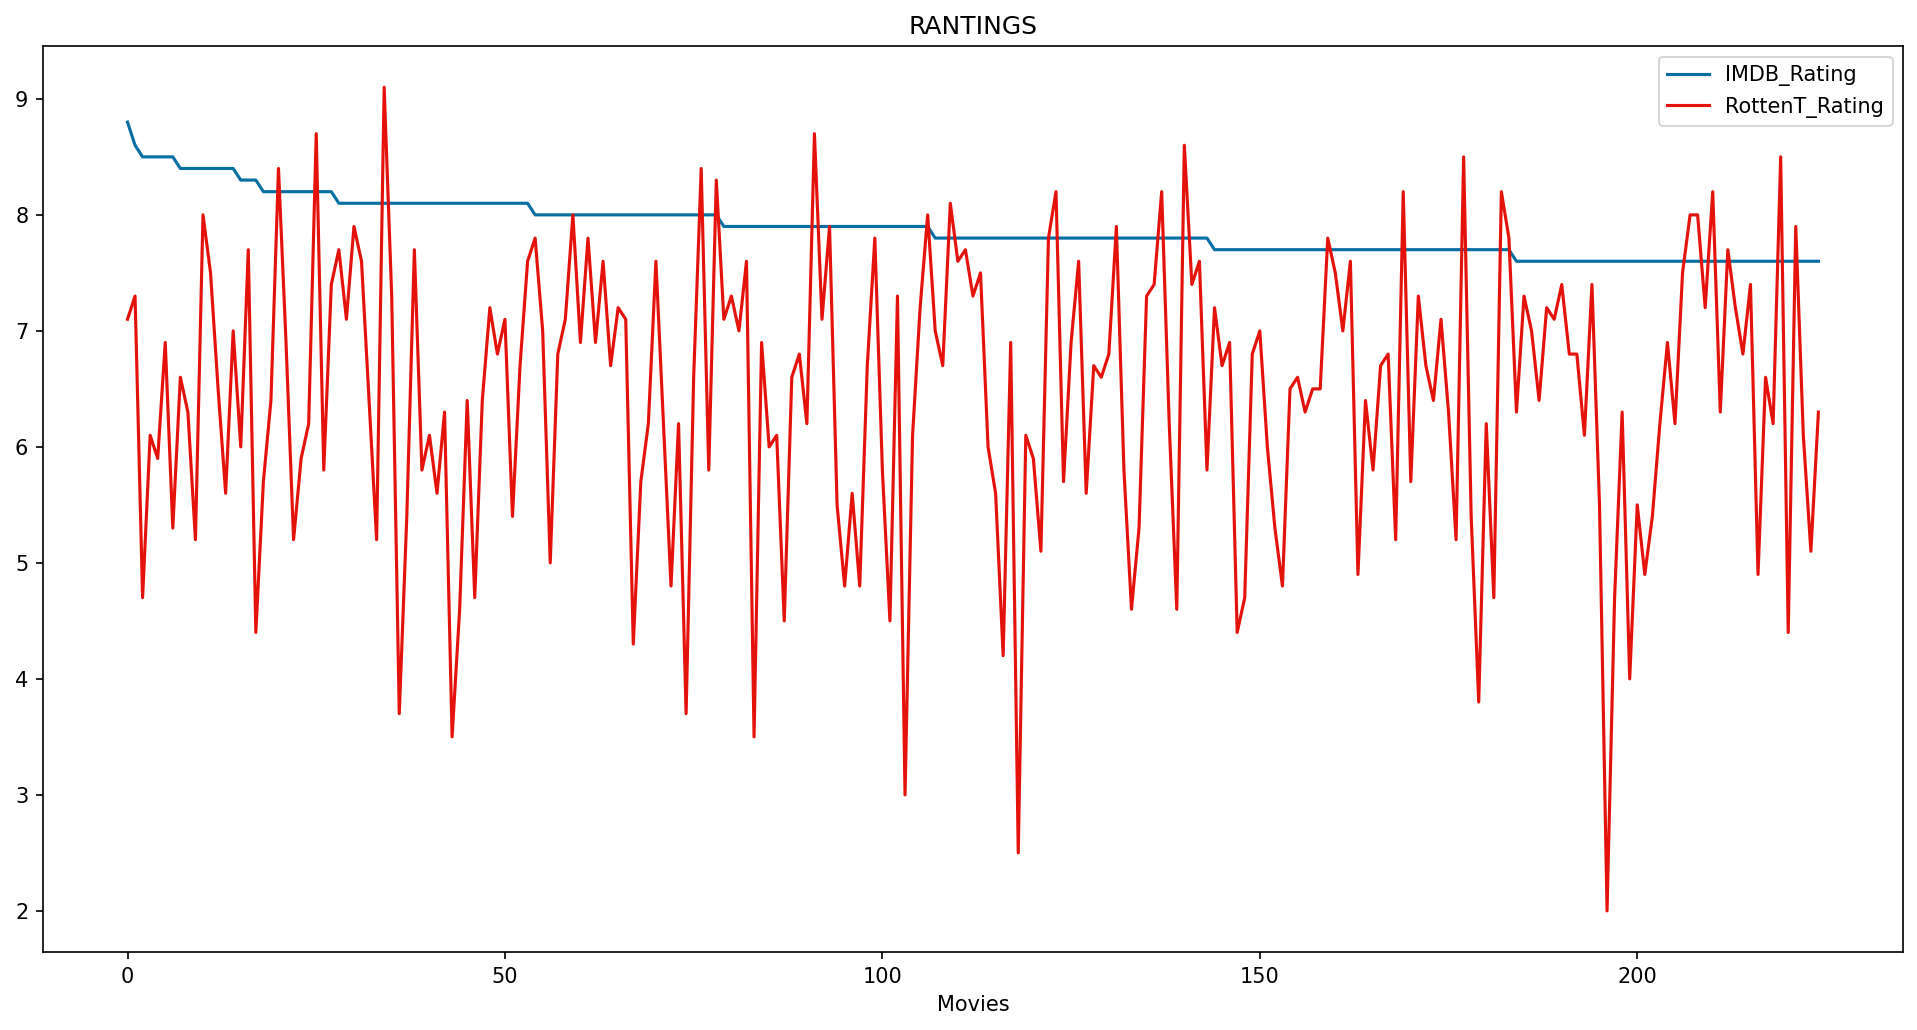

In [210]:


plt.figure(figsize=(16, 8), dpi=150)

df_FINAL["IMDB_Rating"].plot(label = "IMDB_Rating", color =BLUE)
df_FINAL["RottenT_Rating"].plot(label = "RottenT_Rating", color =RED)
plt.title('RANTINGS')
plt.xlabel('Movies')
plt.legend();



In the graphic above we can see the values that the rating is taking through the total sample

In [ ]:
y = np.array(gross_years)
x =gross_years.index

fig, ax = plt.subplots(figsize=(12, 6))
y = np.array(df_FINAL)
ax.yaxis.set_tick_params(labelright=True,labelleft =False, length=10,labelsize=17)
ax.xaxis.set_tick_params(length=10,labelsize=15)
ax.plot(df_FINAL, color= GREEN, lw=5)
ax.scatter(x=x,y=y, fc= GREEN, s=100, lw=1.5, ec="white", zorder=12)
ax.grid(axis = "y", color="#A8BAC4", lw=1.2)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)

ax.set_xlim(1975, 2020)


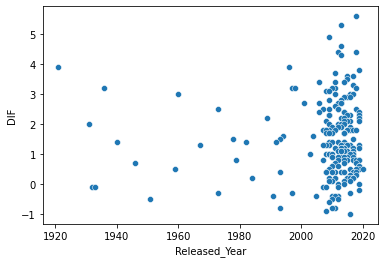

In [377]:
sns.scatterplot(y='DIF',x='Released_Year', data=df_test1);

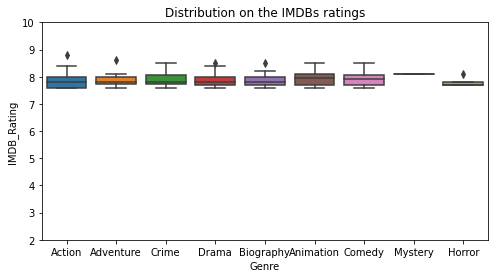

In [201]:
plt.figure(figsize=(8, 4))
sns.boxplot(x="Genre", y="IMDB_Rating", data=df_FINAL)
plt.ylim(2, 10);
plt.title('Distribution on the IMDBs ratings')

plt.show();

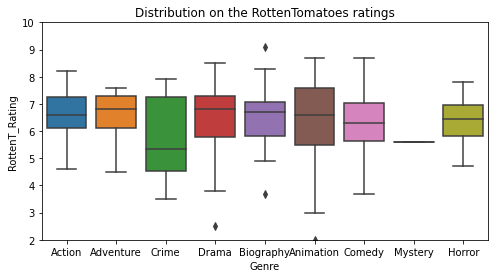

In [202]:
plt.figure(figsize=(8, 4))
sns.boxplot(x="Genre", y="RottenT_Rating", data=df_FINAL)
plt.ylim(2, 10);
plt.title('Distribution on the RottenTomatoes ratings')

plt.show();

From these boxplots we can see the variance present in the data from Rotten Tomatoes. More the spread, more the variance.
We can also perceive that in this case the boxplots are not symmetric, wich means this data is skewed.

In conclusion, we can corroborate that the critics' evaluation of RottenTomatoes does not follow external patterns. 

## Web Scrapping

In [39]:
dict_BoxOffice = {
    'url_pag1' : 'https://www.boxofficemojo.com/chart/ww_top_lifetime_gross/',
'url_pag2' : 'https://www.boxofficemojo.com/chart/ww_top_lifetime_gross/?offset=200',
'url_pag3' : 'https://www.boxofficemojo.com/chart/ww_top_lifetime_gross/?offset=400',
'url_pag4' : 'https://www.boxofficemojo.com/chart/ww_top_lifetime_gross/?offset=600',
'url_pag5' : 'https://www.boxofficemojo.com/chart/ww_top_lifetime_gross/?offset=800'
}

In [284]:
def df_BoxOffice(url_BoxOffice):
        
    res = requests.get(url_BoxOffice)
    html = res.content
    soup = BeautifulSoup(html, "html.parser")
   
    movie = soup.select("a.a-link-normal")
    if url_BoxOffice == 'https://www.boxofficemojo.com/chart/ww_top_lifetime_gross/?offset=200':
        movie1 = movie[15:105:2] 
        movie2 = movie[104:178:2]
        movie3 = movie[177:267:2]
        movie4 = movie[266:412:2]
        movie = movie1 + movie2 +movie3 + movie4
    elif url_BoxOffice == 'https://www.boxofficemojo.com/chart/ww_top_lifetime_gross/?offset=400':
        movie1 = movie[15:405:2] 
        movie2 = movie[404:414:2]
        movie = movie1 + movie2
    elif url_BoxOffice == 'https://www.boxofficemojo.com/chart/ww_top_lifetime_gross/?offset=600':
        movie1 = movie[15:108:2] 
        movie2 = movie[108:376:2] 
        movie3 = movie[375:412:2]
        movie = movie1 + movie2 + movie3
    elif url_BoxOffice == 'https://www.boxofficemojo.com/chart/ww_top_lifetime_gross/?offset=800':
        movie1 = movie[15:78:2] 
        movie2 = movie[78:290:2] 
        movie3 = movie[289:412:2]
        movie = movie1 + movie2 + movie3
    else:
        movie = movie[15::2]
    
    
    Year = soup.select("a.a-link-normal")
    if url_BoxOffice == 'https://www.boxofficemojo.com/chart/ww_top_lifetime_gross/?offset=200':
        movie1 = movie[15:105:2] 
        movie2 = movie[104:178:2]
        movie3 = movie[177:267:2]
        movie4 = movie[266:412:2]
        movie = movie1 + movie2 +movie3 + movie4
    elif url_BoxOffice == 'https://www.boxofficemojo.com/chart/ww_top_lifetime_gross/?offset=400':
        movie1 = movie[15:405:2] 
        movie2 = movie[404:414:2]
        movie = movie1 + movie2
    elif url_BoxOffice == 'https://www.boxofficemojo.com/chart/ww_top_lifetime_gross/?offset=600':
        movie1 = movie[15:108:2] 
        movie2 = movie[108:376:2] 
        movie3 = movie[375:412:2]
        movie = movie1 + movie2 + movie3
    elif url_BoxOffice == 'https://www.boxofficemojo.com/chart/ww_top_lifetime_gross/?offset=800':
        movie1 = movie[15:78:2] 
        movie2 = movie[78:290:2] 
        movie3 = movie[289:412:2]
        movie = movie1 + movie2 + movie3
    else:
        movie = movie[15::2]
    
    
    
    
    all_movies = [i.getText()for i in movie]
    all_movies = all_movies[:200]
    
    gross = soup.find_all("td", attrs={"class":"a-text-right mojo-field-type-money"})
    all_grosses = [i.getText().replace("$", "").replace(",", "") for i in gross]
    all_grosses = all_grosses[::3]
    all_grosses = [int (i) for i in all_grosses if i.isdigit() == True]
    
    gross_US = soup.find_all("td", attrs={"class":"a-text-right mojo-field-type-percent"})
    all_grosses_US = [i.getText().replace('%','').replace('<','').replace('-','0') for i in gross_US]
    all_grosses_US = all_grosses_US[::2]
    all_grosses_US = [float (i) for i in all_grosses_US]
    
    box_office = {
    "Movie" : all_movies,
    "Worldwide Lifetime Gross / US$" : all_grosses,
    "% Gross in US" : all_grosses_US   
                        }
    df_box_office = pd.DataFrame(box_office)
    return df_box_office




In [189]:
df_BoxOffice(url_pag1)

,Movie,Worldwide Lifetime Gross / US$,% Gross in US
0,Sherlock Holmes: A Game of Shadows,543848418,34.4
1,Despicable Me,543157985,46.3
2,Cinderella,542358331,37.1
3,Madagascar,542063846,35.7
4,World War Z,540455876,37.5
...,...,...,...
195,Noah,359200044,28.2
196,The Karate Kid,359126022,49.2
197,Home Alone 2: Lost in New York,358994850,48.4
198,Hotel Transylvania,358375603,41.4


In [285]:
df_base = pd.DataFrame(columns=['Movie', 'Worldwide Lifetime Gross / US$', '% Gross in US'])
df_base

,Movie,Worldwide Lifetime Gross / US$,% Gross in US


In [286]:
for url in dict_BoxOffice.values():
    df_BoxOffice(url)
    df_base = pd.concat([df_base, df_BoxOffice(url)], axis=0)

In [287]:
df_base

,Movie,Worldwide Lifetime Gross / US$,% Gross in US
0,Avatar,2923818852,26.9
1,Avengers: Endgame,2797501328,30.7
2,Titanic,2201647264,30.0
3,Star Wars: Episode VII - The Force Awakens,2069521700,45.3
4,Avengers: Infinity War,2048359754,33.1
...,...,...,...
195,The Descendants,177243185,46.6
196,The A-Team,177238796,43.6
197,Tootsie,177200271,100.0
198,In the Line of Fire,176997168,57.8


In [288]:
df_base.to_csv("../Project2_JOA/data/df_BoxOffice.csv", index= True)

In [21]:
df_BoxOffice = pd.read_csv ('./data/df_BoxOffice.csv', encoding='unicode_escape', index_col = 0)
df_BoxOffice

,Movie,Worldwide Lifetime Gross / US$,% Gross in US
0,Avatar,2923818852,26.9
1,Avengers: Endgame,2797501328,30.7
2,Titanic,2201647264,30.0
3,Star Wars: Episode VII - The Force Awakens,2069521700,45.3
4,Avengers: Infinity War,2048359754,33.1
...,...,...,...
195,The Descendants,177243185,46.6
196,The A-Team,177238796,43.6
197,Tootsie,177200271,100.0
198,In the Line of Fire,176997168,57.8


In [22]:
df_BoxOffice_f = df_BoxOffice.drop_duplicates(subset= 'Movie', keep= False)

In [23]:
len(df_BoxOffice_f)

978

In [24]:
df_FINAL

,Movie,Released_Year,Genre,Director,IMDB_Rating,RottenT_Rating,DIF
0,Inception,2010,Action,Christopher Nolan,8.8,7.1,1.7
1,Interstellar,2014,Adventure,Christopher Nolan,8.6,7.3,1.3
2,Joker,2019,Crime,Todd Phillips,8.5,4.7,3.8
3,Whiplash,2014,Drama,Damien Chazelle,8.5,6.1,2.4
4,The Intouchables,2011,Biography,Olivier Nakache,8.5,5.9,2.6
...,...,...,...,...,...,...,...
220,Mulan,1998,Animation,Tony Bancroft,7.6,4.4,3.2
221,Funny Games,1997,Crime,Michael Haneke,7.6,7.9,-0.3
222,Falling Down,1993,Action,Joel Schumacher,7.6,6.1,1.5
223,The Long Goodbye,1973,Comedy,Robert Altman,7.6,5.1,2.5


In [25]:
merged_df = df_FINAL.merge(df_BoxOffice_f, how = 'inner', on = 'Movie')

In [26]:
merged_df

,Movie,Released_Year,Genre,Director,IMDB_Rating,RottenT_Rating,DIF,Worldwide Lifetime Gross / US$,% Gross in US
0,Inception,2010,Action,Christopher Nolan,8.8,7.1,1.7,836848102,35.0
1,Interstellar,2014,Adventure,Christopher Nolan,8.6,7.3,1.3,773897851,24.3
2,Joker,2019,Crime,Todd Phillips,8.5,4.7,3.8,1074445730,31.2
3,The Intouchables,2011,Biography,Olivier Nakache,8.5,5.9,2.6,426588510,2.4
4,Avengers: Endgame,2019,Action,Anthony Russo,8.4,6.3,2.1,2797501328,30.7
...,...,...,...,...,...,...,...,...,...
71,Despicable Me,2010,Animation,Pierre Coffin,7.6,7.5,0.1,543157985,46.3
72,Sherlock Holmes,2009,Action,Guy Ritchie,7.6,8.2,-0.6,524028679,39.9
73,The Blind Side,2009,Biography,John Lee Hancock,7.6,6.3,1.3,309231694,82.8
74,Watchmen,2009,Action,Zack Snyder,7.6,6.2,1.4,185382813,58.0


In [27]:
merged_df[merged_df['Released_Year'] == 2009]

,Movie,Released_Year,Genre,Director,IMDB_Rating,RottenT_Rating,DIF,Worldwide Lifetime Gross / US$,% Gross in US
11,Up,2009,Animation,Pete Docter,8.2,5.9,2.3,735099102,39.9
34,District 9,2009,Action,Neill Blomkamp,7.9,5.6,2.3,210888950,54.8
35,Star Trek,2009,Action,J.J. Abrams,7.9,7.8,0.1,385680446,66.8
48,Avatar,2009,Action,James Cameron,7.8,5.3,2.5,2923818852,26.9
60,The Hangover,2009,Comedy,Todd Phillips,7.7,6.7,1.0,469328079,59.1
72,Sherlock Holmes,2009,Action,Guy Ritchie,7.6,8.2,-0.6,524028679,39.9
73,The Blind Side,2009,Biography,John Lee Hancock,7.6,6.3,1.3,309231694,82.8
74,Watchmen,2009,Action,Zack Snyder,7.6,6.2,1.4,185382813,58.0


In [385]:
# comparativa de ratings segun website con el gross
# comparar por categoria sde peliculas: ver la evolucion
# ver la categoria mas vista
# en que genero difiere mas la critica. agrupar por geenr o y vrer imbd y rotten


#mas scraping: dinero invertido por hollywood por año
#covid?
#mirar al total de suscriopciones/visualizcion es plataformas streaming
#m



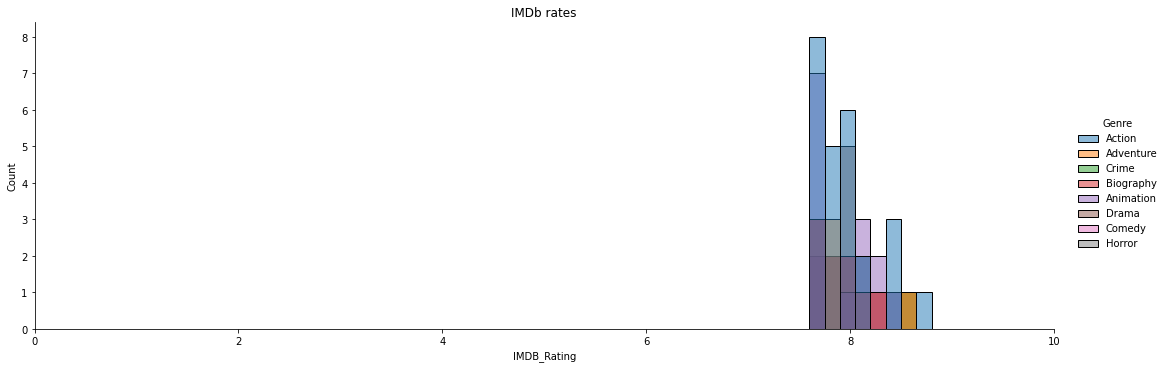

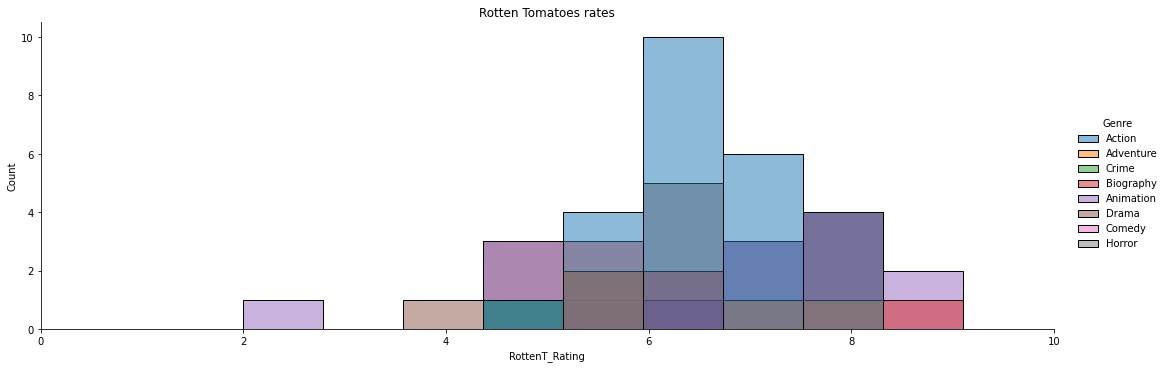

In [123]:
sns.displot(merged_df, x="IMDB_Rating", hue = "Genre", aspect= 3).set(title="IMDb rates")
plt.xlim(0, 10)
sns.displot(merged_df, x="RottenT_Rating", hue = "Genre", aspect = 3).set(title="Rotten Tomatoes rates")
plt.xlim(0, 10);


In [29]:
merged_df.corr()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_15528\4191659586.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_df.corr()


,Released_Year,IMDB_Rating,RottenT_Rating,DIF,Worldwide Lifetime Gross / US$,% Gross in US
Released_Year,1.000000,0.165951,0.057794,-0.021120,0.048203,-0.204226
IMDB_Rating,0.165951,1.000000,0.074488,0.144392,0.247420,-0.417445
RottenT_Rating,0.057794,0.074488,1.000000,-0.976016,-0.185491,-0.045494
DIF,-0.021120,0.144392,-0.976016,1.000000,0.238071,-0.045987
Worldwide Lifetime Gross / US$,0.048203,0.247420,-0.185491,0.238071,1.000000,-0.411850
% Gross in US,-0.204226,-0.417445,-0.045494,-0.045987,-0.411850,1.000000


In [30]:
df_corr = merged_df.drop (['DIF', '% Gross in US'],axis=1)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_15528\232598585.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_corr.corr(), xticklabels=df_corr.corr().columns, yticklabels=df_corr.corr().columns, cmap='RdYlGn', center=0, annot=True)


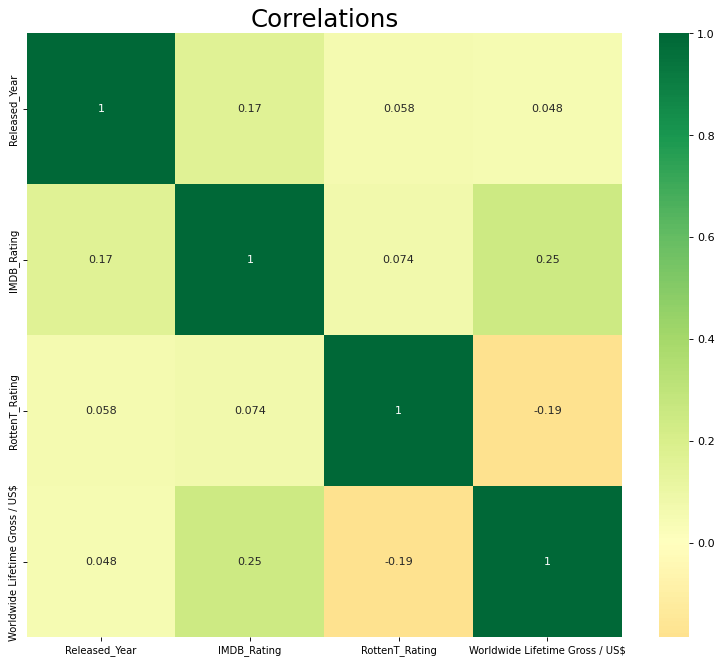

In [112]:
plt.figure(figsize=(12,10), dpi= 80)

sns.heatmap(df_corr.corr(), xticklabels=df_corr.corr().columns, yticklabels=df_corr.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Correlations', fontsize=22)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9);

In [49]:
gross_years = round(merged_df.groupby(by="Released_Year")["Worldwide Lifetime Gross / US$"].sum()/1000000, 2)
gross_years

Released_Year
1978     255.61
1993     368.88
1997    2201.65
1998     304.32
2001     579.71
2003     940.35
2008    1461.00
2009    5743.46
2010    3846.04
2011     643.23
2012    4572.81
2013    1409.35
2014    3631.69
2015    1969.14
2016    4689.61
2017    3238.68
2018    5746.14
2019    5858.49
Name: Worldwide Lifetime Gross / US$, dtype: float64

In [33]:
y = np.array(gross_years)
x =gross_years.index

In [52]:
BROWN = "#AD8C97"
BROWN_DARKER = "#7d3a46"
GREEN = "#2FC1D3"
BLUE = "#076FA1"
GREY = "#C7C9CB"
GREY_DARKER = "#5C5B5D"
RED = "#E3120B"

In [60]:
from flexitext import flexitext
from matplotlib import lines
from matplotlib import patches
from matplotlib.patheffects import withStroke

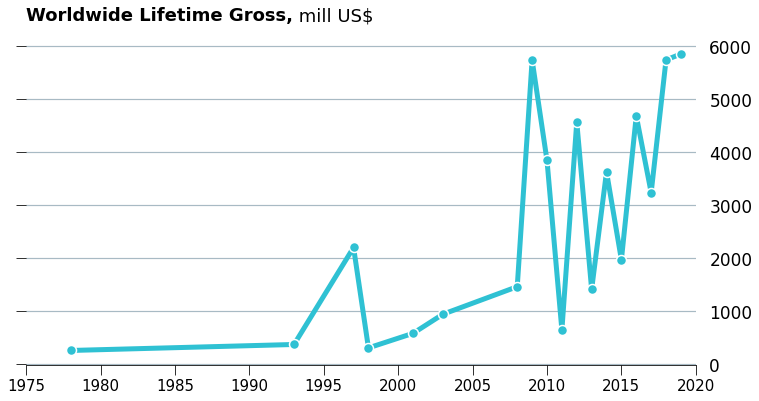

In [165]:
fig, ax = plt.subplots(figsize=(12, 6))
y = np.array(gross_years)
ax.yaxis.set_tick_params(labelright=True,labelleft =False, length=10,labelsize=17)
ax.xaxis.set_tick_params(length=10,labelsize=15)
ax.plot(gross_years, color= GREEN, lw=5)
ax.scatter(x=x,y=y, fc= GREEN, s=100, lw=1.5, ec="white", zorder=12)
ax.grid(axis = "y", color="#A8BAC4", lw=1.2)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)

ax.set_xlim(1975, 2020)



text = "<size:18><weight:bold>Worldwide Lifetime Gross,</> mill US$</>"
flexitext(0, 1.1, text, va="top", ax=ax);



In [1]:
import matplotlib.pyplot as plt
# gross_years.plot()

In [159]:
ranked_genre_RT = merged_df.groupby(by="Genre")["RottenT_Rating"].mean()
ranked_genre_imdb = merged_df.groupby(by="Genre")["IMDB_Rating"].mean()
df_genre1 = pd.DataFrame(ranked_genre_RT)
df_genre2 = pd.DataFrame(ranked_genre_imdb)
df_genre = pd.concat([df_genre1, df_genre2], axis=1)
df_genre


,RottenT_Rating,IMDB_Rating
Genre,,
Action,6.568000,7.9280
Adventure,6.575000,8.0000
Animation,6.487500,7.8875
Biography,7.140000,7.9400
Comedy,6.700000,7.8250
Crime,4.700000,8.5000
Drama,5.857143,7.9500
Horror,5.450000,7.7000


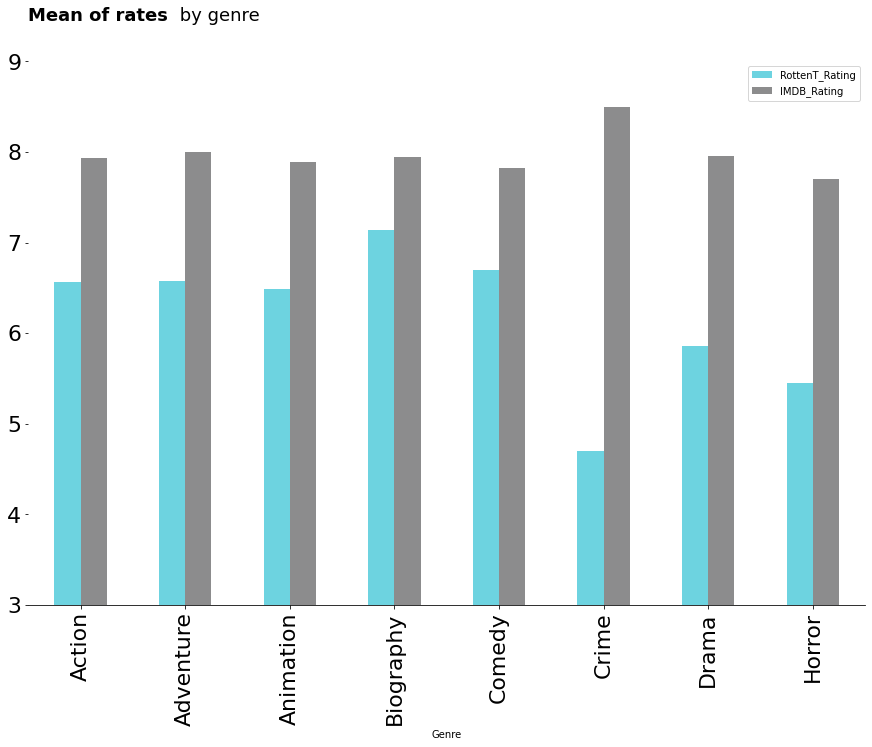

In [158]:
ax = df_genre[['RottenT_Rating','IMDB_Rating']].plot(kind='bar', figsize=(15, 10), legend=True, fontsize=22,color=[GREEN,GREY_DARKER], alpha=0.7, linewidth=40)
ax.set_ylim(3, 9)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)

text = "<size:18><weight:bold>Mean of rates </> by genre</>"
flexitext(0, 1.1, text, va="top", ax=ax);


plt.show()

In [183]:
genre_Gross = round(merged_df.groupby(by="Genre")["Worldwide Lifetime Gross / US$"].sum()/1000000,2)
df_genreG = pd.DataFrame(genre_Gross)
df_genreG.sort_values(by=['Worldwide Lifetime Gross / US$'], inplace=True, ascending = True)

df_genreG

,Worldwide Lifetime Gross / US$
Genre,
Horror,511.36
Crime,1074.45
Comedy,1466.40
Adventure,2237.72
Biography,3277.34
Drama,6714.30
Animation,12027.05
Action,20151.54


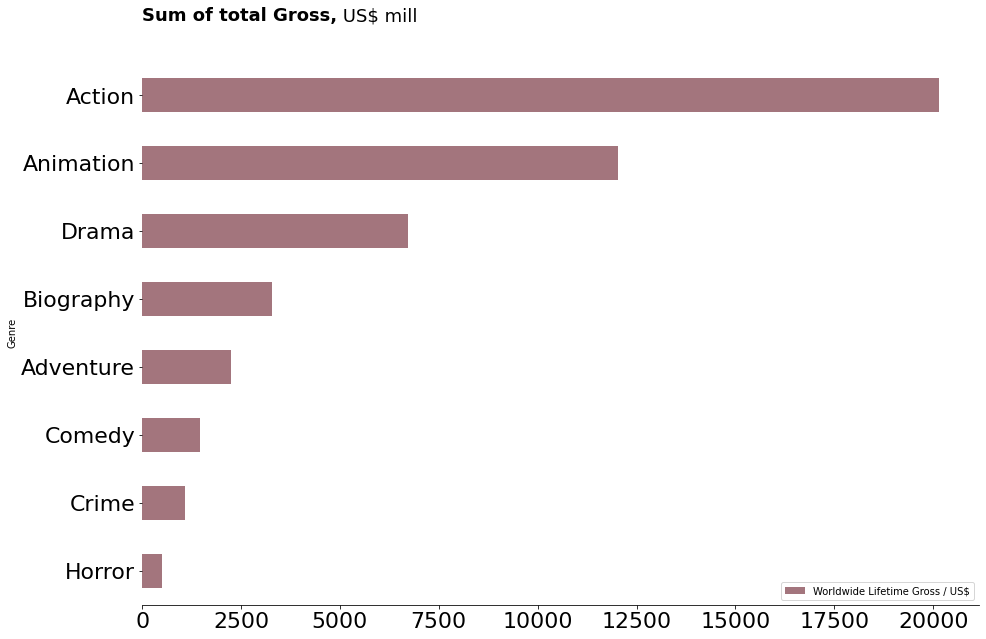

In [186]:
ax = df_genreG[['Worldwide Lifetime Gross / US$']].plot(kind='barh', figsize=(15, 10), legend=True, fontsize=22,color=BROWN_DARKER, alpha=0.7, linewidth=40)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)

text = "<size:18><weight:bold>Sum of total Gross,</> US$ mill</>"
flexitext(0, 1.1, text, va="top", ax=ax);


plt.show();

In [344]:
merged_df.sort_values(by=['DIF'], ascending=False)[:25]

,Movie,Released_Year,Genre,Director,IMDB_Rating,RottenT_Rating,DIF,Worldwide Lifetime Gross / US$,% Gross in US
67,Incredibles 2,2018,Animation,Brad Bird,7.6,2.0,5.6,1243089244,49.0
2,Joker,2019,Crime,Todd Phillips,8.5,4.7,3.8,1074445730,31.2
28,The Help,2011,Drama,Tate Taylor,8.0,4.3,3.7,216639112,78.3
17,Mad Max: Fury Road,2015,Action,George Miller,8.1,4.6,3.5,375709470,41.0
75,Mulan,1998,Animation,Tony Bancroft,7.6,4.4,3.2,304320254,39.6
49,Titanic,1997,Drama,James Cameron,7.8,4.6,3.2,2201647264,30.0
31,Black Swan,2010,Drama,Darren Aronofsky,8.0,4.8,3.2,329398046,32.5
5,Avengers: Infinity War,2018,Action,Anthony Russo,8.4,5.2,3.2,2048359754,33.1
22,Zootopia,2016,Animation,Byron Howard,8.0,5.0,3.0,1024121104,33.3
52,Get Out,2017,Horror,Jordan Peele,7.7,4.7,3.0,255745157,68.9


In [345]:
merged_df.sort_values(by=['Worldwide Lifetime Gross / US$'], ascending=False)[:25]

,Movie,Released_Year,Genre,Director,IMDB_Rating,RottenT_Rating,DIF,Worldwide Lifetime Gross / US$,% Gross in US
48,Avatar,2009,Action,James Cameron,7.8,5.3,2.5,2923818852,26.9
4,Avengers: Endgame,2019,Action,Anthony Russo,8.4,6.3,2.1,2797501328,30.7
49,Titanic,1997,Drama,James Cameron,7.8,4.6,3.2,2201647264,30.0
5,Avengers: Infinity War,2018,Action,Anthony Russo,8.4,5.2,3.2,2048359754,33.1
67,Incredibles 2,2018,Animation,Brad Bird,7.6,2.0,5.6,1243089244,49.0
40,Captain America: Civil War,2016,Action,Anthony Russo,7.8,7.5,0.3,1153337496,35.4
61,Skyfall,2012,Action,Sam Mendes,7.7,6.8,0.9,1108569499,27.5
8,The Dark Knight Rises,2012,Action,Christopher Nolan,8.4,6.5,1.9,1081169825,41.4
2,Joker,2019,Crime,Todd Phillips,8.5,4.7,3.8,1074445730,31.2
43,Toy Story 4,2019,Animation,Josh Cooley,7.8,7.8,0.0,1073394593,40.4


In [ ]:
'url_pag1' : 'https://www.boxofficemojo.com/chart/ww_top_lifetime_gross/',
'url_pag2' : 'https://www.boxofficemojo.com/chart/ww_top_lifetime_gross/?offset=200',
'url_pag3' : 'https://www.boxofficemojo.com/chart/ww_top_lifetime_gross/?offset=400',
'url_pag4' : 'https://www.boxofficemojo.com/chart/ww_top_lifetime_gross/?offset=600',
'url_pag5' : 'https://www.boxofficemojo.com/chart/ww_top_lifetime_gross/?offset=800'

In [424]:
url_pag1 = 'https://www.boxofficemojo.com/chart/ww_top_lifetime_gross/?offset=200'

In [425]:
res = requests.get(url_pag1)
html = res.content
soup = BeautifulSoup(html, "html.parser")

In [474]:
movie = soup.select("a.a-link-normal")

In [ ]:
movie = soup.select("a.a-link-normal")
    if url_BoxOffice == 'https://www.boxofficemojo.com/chart/ww_top_lifetime_gross/?offset=200':
        movie1 = movie[15:105:2] 
        movie2 = movie[104:178:2]
        movie3 = movie[177:267:2]
        movie4 = movie[266:412:2]
        movie = movie1 + movie2 +movie3 + movie4
    elif url_BoxOffice == 'https://www.boxofficemojo.com/chart/ww_top_lifetime_gross/?offset=400':
        movie1 = movie[15:405:2] 
        movie2 = movie[404:414:2]
        movie = movie1 + movie2
    elif url_BoxOffice == 'https://www.boxofficemojo.com/chart/ww_top_lifetime_gross/?offset=600':
        movie1 = movie[15:108:2] 
        movie2 = movie[108:376:2] 
        movie3 = movie[375:412:2]
        movie = movie1 + movie2 + movie3
    elif url_BoxOffice == 'https://www.boxofficemojo.com/chart/ww_top_lifetime_gross/?offset=800':
        movie1 = movie[15:78:2] 
        movie2 = movie[78:290:2] 
        movie3 = movie[289:412:2]
        movie = movie1 + movie2 + movie3
    else:
        movie = movie[15::2]
    

year1 = year[16:104:2]
movie2 = year[105:177:2]
movie3 = year[178:266:2]
year4 = year[265:411:2]
movie = movie1 + movie2 +movie3 + movie4

In [473]:
len(movie)

197

movie1 = movie[15:103:2] 
movie2 = movie[104:177:2]
# movie3 = movie[177:267:2]
# movie4 = movie[266:412:2]
# movie = movie1 + movie2 +movie3 + movie4

In [488]:
movie2[-1]

<a class="a-link-normal" href="/year/2012/?ref_=bo_cso_table_81">2012</a>

In [243]:
all_movies = [i.getText()for i in movieall]


In [228]:
all_movies = [i.getText()for i in movie]

In [244]:
all_movies

['Your Name.',
 'Top Gun',
 'The Legend of Tarzan',
 'American Beauty',
 'Spirited Away',
 'Apollo 13',
 'Rain Man',
 'The Great Gatsby',
 'Dumbo',
 'I, Robot',
 'Basic Instinct',
 'Murder on the Orient Express',
 'X-Men: First Class',
 'The Angry Birds Movie',
 'GoldenEye',
 'Catch Me If You Can',
 'Now You See Me',
 'Hannibal',
 'The Mask',
 'Peter Rabbit',
 'Speed',
 'Dinosaur',
 'Mary Poppins Returns',
 'Deep Impact',
 'The Lorax',
 'The Maze Runner',
 'The Smurfs 2',
 'National Treasure',
 'Rush Hour 2',
 'Trolls',
 'xXx: Return of Xander Cage',
 'Pocahontas',
 'How the Grinch Stole Christmas',
 'Star Trek Beyond',
 'Alvin and the Chipmunks: Chipwrecked',
 'Wanted',
 'The Flintstones',
 'A Quiet Place',
 'Enchanted',
 'Over the Hedge',
 '300: Rise of an Empire',
 'Batman Forever',
 'Prince of Persia: The Sands of Time',
 'The Curious Case of Benjamin Button',
 'Journey 2: The Mysterious Island',
 'The Rock',
 'The Great Wall',
 'Now You See Me 2',
 'Never Say Die',
 'Fantastic Fou

In [245]:
all_movies = all_movies[:200]

In [247]:
gross = soup.find_all("td", attrs={"class":"a-text-right mojo-field-type-money"})
int(gross[0].getText().replace("$", "").replace(",", ""))

358180115

In [248]:
all_grosses = [i.getText().replace("$", "").replace(",", "") for i in gross]

In [249]:
all_grosses = all_grosses[::3]

In [250]:
all_grosses = [int (i) for i in all_grosses if i.isdigit() == True]

In [251]:
gross_US = soup.find_all("td", attrs={"class":"a-text-right mojo-field-type-percent"})
gross_US[0].getText().replace('%','')

'1.4'

In [252]:
all_grosses_US = [i.getText().replace('%','').replace('<','').replace('-','0') for i in gross_US]

In [253]:
all_grosses_US = all_grosses_US[::2]

In [254]:
all_grosses_US = [float (i) for i in all_grosses_US]

In [255]:
box_office = {
    "Movie" : all_movies,
    "Worldwide Lifetime Gross / US$" : all_grosses,
    "% Gross in US" : all_grosses_US   
}

In [257]:
df_box_office = pd.DataFrame(box_office)
df_box_office

,Movie,Worldwide Lifetime Gross / US$,% Gross in US
0,Your Name.,358180115,1.4
1,Top Gun,357288178,50.4
2,The Legend of Tarzan,356700357,35.5
3,American Beauty,356296601,36.5
4,Spirited Away,355725195,3.9
...,...,...,...
195,The Princess and the Frog,267045765,39.1
196,Batman Returns,266915287,61.0
197,Indecent Proposal,266614059,40.0
198,Something's Gotta Give,265328738,47.0
